# Round 2

In [1]:
import pandas as pd

data = pd.read_csv("marketing_customer_analysis_round_2.csv")
data.shape

(10910, 26)

In [2]:
data.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
#standardize headers and remove Unnamed Column. Added in final round is turning to lower case and replacing space with _

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data = data.rename(columns={'EmploymentStatus':'Employment Status'})
data.columns = data.columns.str.replace(' ', '_')
cols = []
for column in data.columns:
    cols.append(column.lower())
data.columns = cols
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [5]:
#split numerical and objects

In [6]:
data.dtypes
data._get_numeric_data()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
data.dtypes
data.select_dtypes(['object'])

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [8]:
#within numericals see how many NaN data

In [9]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer_lifetime_value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective_to_date,0.00
7,employment_status,0.00
8,gender,0.00
9,income,0.00


In [10]:
#In most cases <6% NaNs so will drop these records. Vehicle type has 50% so can't use the data, will drop that column. 

In [11]:
data = data[data['state'].isna()==False]
data = data[data['response'].isna()==False]
data = data[data['months_since_last_claim'].isna()==False]
data = data[data['number_of_open_complaints'].isna()==False]
data = data[data['vehicle_class'].isna()==False]
data = data[data['vehicle_size'].isna()==False]
data = data.drop(['vehicle_type'], axis=1)

In [12]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employment_status,0.0
8,gender,0.0
9,income,0.0


In [13]:
data.shape

(9134, 24)

In [14]:
#Checked and there are no NaNs left. File now has 9134 records and 24 columns. 

In [15]:
#Removing duplicates

In [16]:
print(data.shape)
data = data.copy()
data = data.drop_duplicates()
print(data.shape)

(9134, 24)
(9134, 24)


In [17]:
#There were/are no duplicates. 

In [18]:
#exctract the months and store in separate column. Filter all rows with effective months in Q1

In [19]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'], errors='coerce')
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [20]:
data["effective_month"] = data['effective_to_date'][0].month
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,2
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2


In [21]:
data['effective_month'].unique()
data['effective_month'].value_counts()

data['effective_month'].value_counts(dropna=False)

2    9134
Name: effective_month, dtype: int64

In [22]:
#All rows have an effective date in February so in the 1st quarter, no need to filter out any records. 
#Improvement from original: this time checked the values in effective months rather than filtering anyway just to find out there's nothing outside Q1. 

# Round 3

In [23]:
#show info and describe

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9134 entries, 0 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employment_status              9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status  

In [25]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,2.0
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.0
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,2.0
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,2.0
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,2.0
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.0
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.0


In [26]:
#Show a plot of responses

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns 

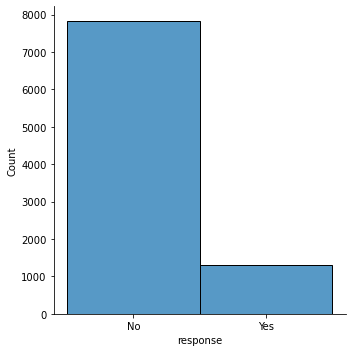

In [28]:
sns.displot(data['response'], bins=2)
plt.show()

In [29]:
#Show a plot of the response rate per channel. First group responses per channel, then calculate responses rate then create the plot. 

In [30]:
table_channel = data.groupby(["sales_channel", "response"]).size()
display(table_channel)

sales_channel  response
Agent          No          2811
               Yes          666
Branch         No          2273
               Yes          294
Call Center    No          1573
               Yes          192
Web            No          1169
               Yes          156
dtype: int64

In [31]:
rates = []
for i in range(1, len(table_channel), 2):
    rates.append(table_channel[i]/(table_channel[i]+table_channel[i-1])*100)
rates

[19.15444348576359, 11.453058044409817, 10.878186968838527, 11.773584905660377]

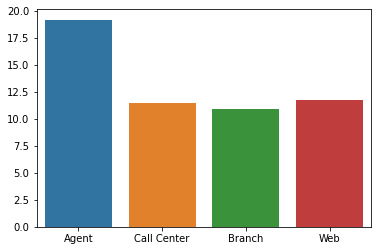

In [32]:
sns.barplot(x=data['sales_channel'].unique(), y=rates)
plt.show()

In [33]:
#Response rate by total claim amount. First create categories for the total claim amount, then use same method as above.
#Improvement final round: use pd-cut for ranges rather than manual

In [34]:
claim_amount = data.copy()

In [35]:
claim_amount['range'] = pd.cut(data.total_claim_amount, 5)
claim_amount['range'].unique()

[(-2.794, 578.727], (578.727, 1157.355], (1157.355, 1735.983], (1735.983, 2314.612], (2314.612, 2893.24]]
Categories (5, interval[float64, right]): [(-2.794, 578.727] < (578.727, 1157.355] < (1157.355, 1735.983] < (1735.983, 2314.612] < (2314.612, 2893.24]]

In [36]:
claim_amount_responses = claim_amount.groupby(['range', 'response']).size()
claim_amount_responses

range                 response
(-2.794, 578.727]     No          6117
                      Yes         1068
(578.727, 1157.355]   No          1484
                      Yes          204
(1157.355, 1735.983]  No           183
                      Yes           36
(1735.983, 2314.612]  No            36
                      Yes            0
(2314.612, 2893.24]   No             6
                      Yes            0
dtype: int64

In [37]:
rates = []
for i in range(1, len(claim_amount_responses), 2):
    rates.append(claim_amount_responses[i]/(claim_amount_responses[i]+claim_amount_responses[i-1])*100)
rates

[14.864300626304802, 12.085308056872037, 16.43835616438356, 0.0, 0.0]

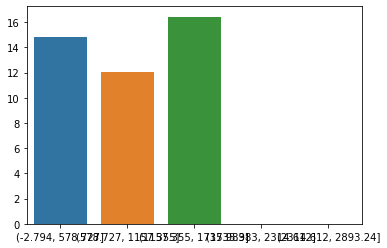

In [38]:
sns.barplot(x=claim_amount["range"].unique(), y=rates)
plt.show()

In [39]:
#Response rate by total claim amount. First create categories for the total claim amount, then use same method as above.
#Improvement final round: use pd-cut for ranges rather than manual

In [40]:
income_table = data.copy()
income_table['range_income'] = pd.cut(income_table.income, 10)

In [41]:
income_table_responses = income_table.groupby(['range_income', 'response']).size()
income_table_responses

range_income        response
(-99.981, 9998.1]   No          2119
                    Yes          198
(9998.1, 19996.2]   No           360
                    Yes          162
(19996.2, 29994.3]  No          1099
                    Yes          282
(29994.3, 39992.4]  No           767
                    Yes          126
(39992.4, 49990.5]  No           677
                    Yes           72
(49990.5, 59988.6]  No           671
                    Yes          120
(59988.6, 69986.7]  No           645
                    Yes          114
(69986.7, 79984.8]  No           578
                    Yes          120
(79984.8, 89982.9]  No           491
                    Yes           54
(89982.9, 99981.0]  No           419
                    Yes           60
dtype: int64

In [42]:
rates_income = []
for i in range(1, len(income_table_responses), 2):
    rates_income.append(income_table_responses[i]/(income_table_responses[i]+income_table_responses[i-1])*100)
rates_income

[8.54553301683211,
 31.03448275862069,
 20.41998551774077,
 14.109742441209406,
 9.612817089452603,
 15.170670037926676,
 15.019762845849801,
 17.191977077363894,
 9.908256880733946,
 12.526096033402922]

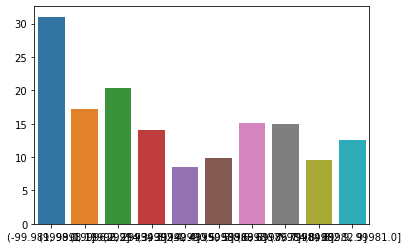

In [43]:
sns.barplot(x=income_table['range_income'].unique(), y=rates_income)
plt.show()

# Round 4

In [44]:
#Check data types of each column and split numerical and categoricals

In [45]:
data.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [46]:
numerical = data._get_numeric_data()
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,2
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


In [47]:
categoricals = data.select_dtypes(include=['object', "datetime64"])
categoricals.head()

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,2011-02-18,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,2011-01-18,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2011-02-10,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,2011-01-11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,2011-02-14,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

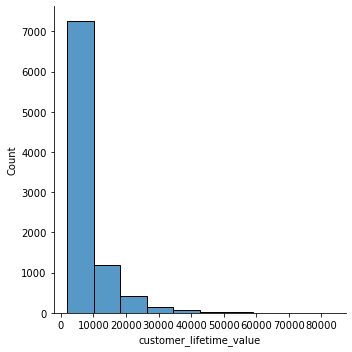

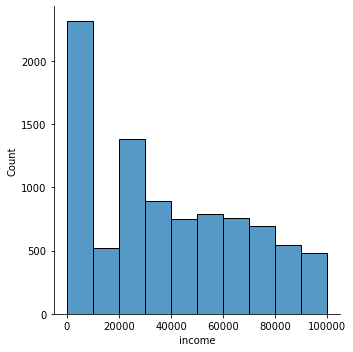

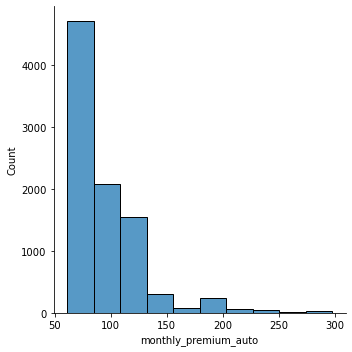

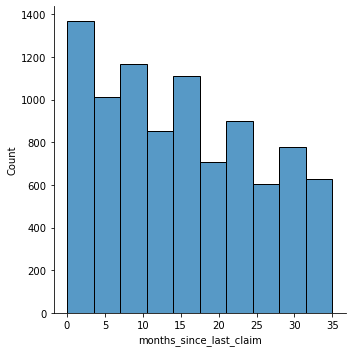

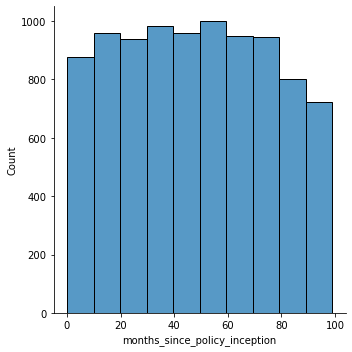

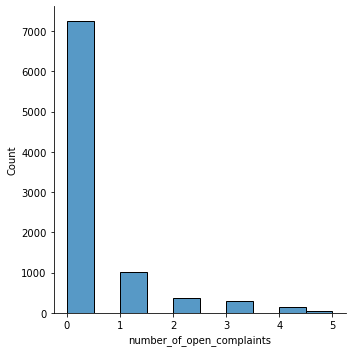

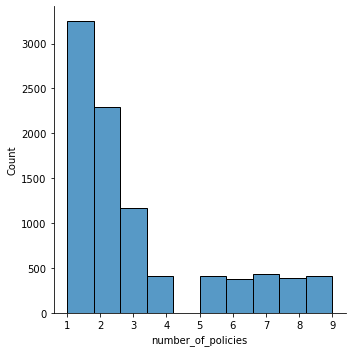

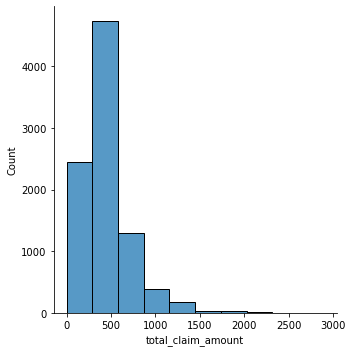

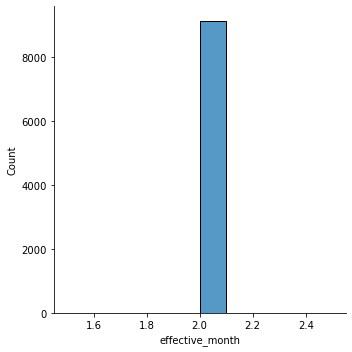

In [49]:
col = numerical.columns
for i in col: 
    sns.displot(numerical[i], bins=10)
    plt.show()

customer_lifetime_value


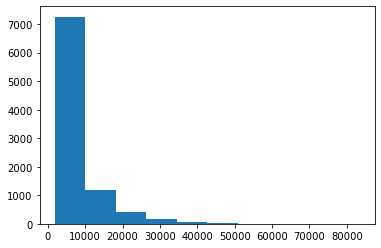

income


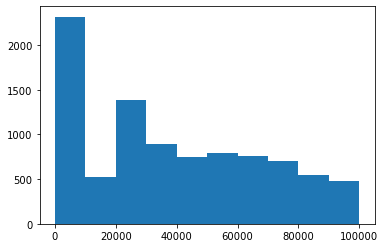

monthly_premium_auto


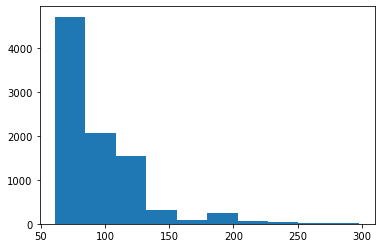

months_since_last_claim


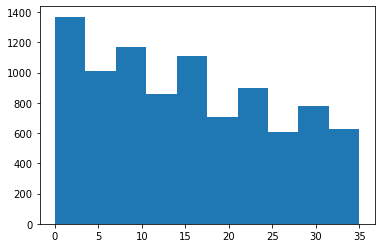

months_since_policy_inception


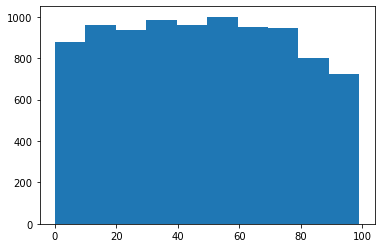

number_of_open_complaints


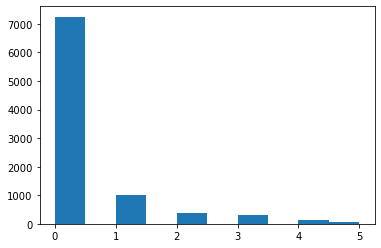

number_of_policies


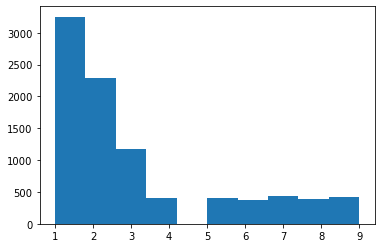

total_claim_amount


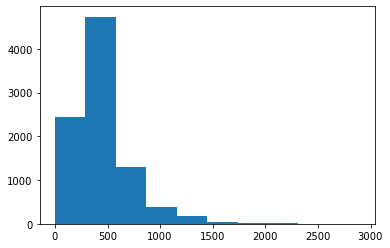

effective_month


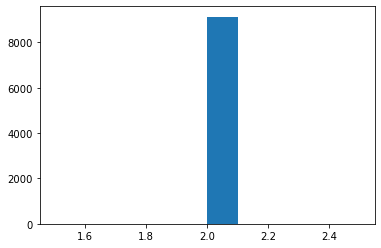

In [50]:
col = numerical.columns
for i in col: 
    print(i)
    plt.hist(numerical[i])
    plt.show()

In [51]:
#the distribution of the data does not look like normal distribution. 
#Then look at multicollinearity

In [52]:
correlations_matrix = numerical.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,NaN
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,NaN
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,NaN
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,NaN
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,NaN
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,NaN
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,NaN
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,NaN
effective_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


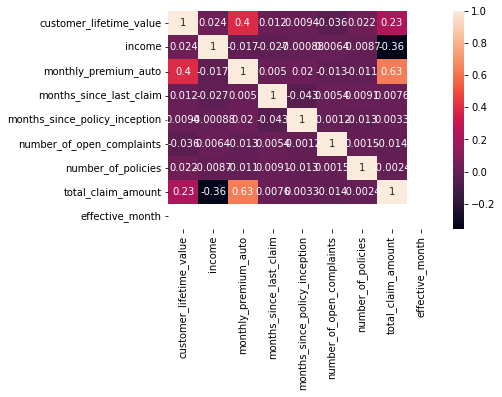

In [53]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [54]:
#Nothing is highly correlated so not dropping features. 

# Round 5

In [55]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,2
6,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2


In [56]:
numerical = numerical.drop('effective_month', axis=1)#Because that effective month isn't bringing us anything, they're all from February! 

In [57]:
numerical.describe()#to see what the values look like before standardizing

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [58]:
#checking CLV and income in more details, removing outliers 

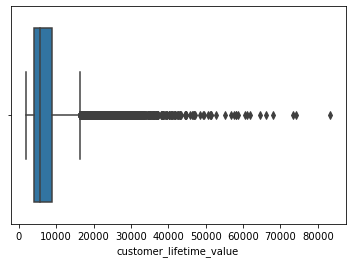

In [59]:
sns.boxplot(x = 'customer_lifetime_value', data=data)
plt.show()

In [60]:
import numpy as np

In [61]:
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25)
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 1.5*iqr

In [62]:
data.shape

(9134, 25)

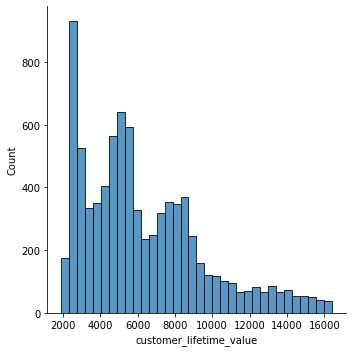

In [63]:
data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
sns.displot(data['customer_lifetime_value'])
plt.show()

In [64]:
data.shape

(8317, 25)

In [65]:
#Because I've removed rows from the data file, I'll split it again in Numerical and Categorical to get "clean" dataframes.

In [66]:
clean_data = data.copy()
clean_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
6,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
7,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,RY92254,Washington,4547.892543,No,Premium,Bachelor,2011-01-13,Employed,M,33531,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,2
10902,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,2
10903,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2


In [67]:
clean_data = clean_data.reset_index(drop=True)
clean_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,2
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
4,IH64929,California,4956.247235,No,Basic,High School or Below,2011-02-24,Employed,M,87197,...,0.0,3,Personal Auto,Personal L2,Offer2,Branch,247.402353,Two-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,RY92254,Washington,4547.892543,No,Premium,Bachelor,2011-01-13,Employed,M,33531,...,0.0,1,Personal Auto,Personal L3,Offer4,Agent,801.577478,Two-Door Car,Medsize,2
8313,PP30874,California,3579.023825,No,Extended,High School or Below,2011-01-24,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,2
8314,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,2
8315,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,2


In [68]:
clean_numerical = clean_data._get_numeric_data()
clean_numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,2
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
4,4956.247235,87197,63,35.0,45,0.0,3,247.402353,2


In [69]:
clean_cat = clean_data.select_dtypes(include=['object'])
clean_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
4,IH64929,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize


In [70]:
y = clean_numerical['total_claim_amount']
X = clean_numerical.drop(['total_claim_amount'], axis=1)

In [71]:
#Income doesn't have a lot of outliers, so no need to remove. 

In [72]:
#Scaling the data

In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [74]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized, columns=X.columns)

(8317, 8)


In [75]:
x_normalized.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_month
count,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.0
mean,0.301949,0.376456,0.126370,0.429554,0.485486,0.078634,0.254749,0.0
std,0.223329,0.304211,0.131002,0.286824,0.282023,0.185428,0.308874,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.127415,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000,0.0
50%,0.246185,0.338434,0.084388,0.400000,0.484848,0.000000,0.125000,0.0
75%,0.431754,0.622408,0.194093,0.657143,0.717172,0.000000,0.375000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# Round 6

In [76]:
clean_cat.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
4,IH64929,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize


In [77]:
clean_cat.shape #just checking that it matches with clean_numericals

(8317, 15)

In [78]:
#need to drop columns that have numbers but not categories (such as unique Customer ID, dates) and then use OneHotEncoder to deal with categories. 

In [79]:
clean_cat = clean_cat.drop(["customer"], axis=1)
clean_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
4,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize


In [80]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(clean_cat)
print(encoder.categories_)
encoded = encoder.transform(clean_cat).toarray()
print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
onehot_encoded.head()

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
      dtype=object), array(['Disabled', 'Employed', 'Medical Leave', 'Retired', 'Unemployed'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Rural', 'Suburban', 'Urban'], dtype=object), array(['Divorced', 'Married', 'Single'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L1', 'Corporate L2', 'Corporate L3', 'Personal L1',
       'Personal L2', 'Personal L3', 'Special L1', 'Special L2',
       'Special L3'], dtype=object), array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object), array(['Agent', 'Branch', 'Call Center', 'Web'], dtype=object), array(['Four-Door Car', 'Luxury Car', 'Luxury SUV', 'SUV', 'Sports Car',
       'Two-Door Car'], dtype=object), ar

,California,Nevada,Oregon,Washington,Yes,Extended,Premium,College,Doctor,High School or Below,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [81]:
X2 = pd.concat([x_normalized, onehot_encoded], axis=1)

In [82]:
X2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_month,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
0,0.200639,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.022779,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.899395,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.216203,0.374121,0.008439,0.228571,1.000000,0.6,0.375,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.210773,0.872136,0.008439,1.000000,0.454545,0.0,0.250,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [83]:
y2 = clean_data['total_claim_amount']
y2.head()

0    292.800000
1    744.924331
2    480.000000
3    287.556107
4    247.402353
Name: total_claim_amount, dtype: float64

In [84]:
#now that we have cleaned the data and a "final" X and y, we can do the train/test split and use the regression model. 

In [85]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [86]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(6653, 51)
(1664, 51)
(6653,)
(1664,)


In [ ]:
#improvement from original: I fixed my indexing issue so now both files are synced properly.

In [87]:
X2_train.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,effective_month,California,Nevada,...,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Medsize,Small
8091,0.403863,0.496914,0.168776,0.857143,0.494949,0.0,0.25,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
937,0.204365,0.000000,0.037975,0.085714,0.353535,0.0,0.50,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4857,0.240167,0.775667,0.029536,0.942857,0.767677,0.2,0.75,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6405,0.377949,0.548884,0.147679,0.142857,0.111111,0.6,1.00,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4751,0.180965,0.749492,0.215190,0.428571,0.626263,0.0,0.00,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [88]:
y2_train.head()

8091    198.844530
937     646.785442
4857     45.215059
6405    204.953947
4751    192.859737
Name: total_claim_amount, dtype: float64

In [89]:
from sklearn import linear_model

In [90]:
lm = linear_model.LinearRegression()
lm.fit(X2_train,y2_train)

LinearRegression()

In [100]:
#now we have a model, we need to check the score and other metrics to see if model is useful

In [91]:
from sklearn.metrics import r2_score
predictions = lm.predict(X2_train)
r2_score(y2_train, predictions)

0.7694448814314011

In [92]:
predictions = lm.predict(X2_test)
r2_score(y2_test, predictions)

0.7552314887751542

In [93]:
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(y2_test,predictions))
print(mse)

131.955539177921


In [95]:
from sklearn.metrics import mean_absolute_error, r2_score

In [96]:
mae = mean_absolute_error(y2_test, predictions)
print(mae)

91.9127220049355


In [97]:
import math

In [98]:
rmse = math.sqrt(mse)
print(rmse)

11.48719022119513


In [99]:
r2 = r2_score(y2_test, predictions)
r2

0.7552314887751542

# Round 7

In [ ]:
#How to improve the score of the model

In [101]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [102]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(7485, 51)
(832, 51)
(7485,)
(832,)


In [103]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X2_train,y2_train)

LinearRegression()

In [104]:
from sklearn.metrics import r2_score
predictions = lm.predict(X2_train)
r2_score(y2_train, predictions)

0.7673543235744985

In [105]:
predictions = lm.predict(X2_test)
r2_score(y2_test, predictions)

0.7623233177592463

In [ ]:
#the score on the train set is lower, but actually improved on the test set. 

In [107]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.15, random_state=42)

In [108]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(7069, 51)
(1248, 51)
(7069,)
(1248,)


In [109]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X2_train,y2_train)

LinearRegression()

In [110]:
from sklearn.metrics import r2_score
predictions = lm.predict(X2_train)
r2_score(y2_train, predictions)

0.7650867449607054

In [111]:
predictions = lm.predict(X2_test)
r2_score(y2_test, predictions)

0.7731146166088967

In [ ]:
#The score improved on both the train and test sets so will keep this split. 

In [ ]:
#Had tried to drop some columns to eliminate the noise but that didnt change a thing, so won't repeat. 